In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2025/SAMPLE_SUBMISSION.xlsx
/kaggle/input/widsdatathon2025/Data Dictionary.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx


In [2]:
#training Data Sets
train_categorical = pd.read_excel('/kaggle/input/widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx')
train_functional = pd.read_csv('/kaggle/input/widsdatathon2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv')
train_quantitative = pd.read_excel('/kaggle/input/widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx')

train_solutions = pd.read_excel('/kaggle/input/widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx')

#Test Data Sets
test_categorical = pd.read_excel('/kaggle/input/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx')
test_functional = pd.read_csv('/kaggle/input/widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')
test_quantitative = pd.read_excel('/kaggle/input/widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx')

#train.drop_duplicates()


In [3]:
train_solutions

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1
...,...,...,...
1208,Atx7oub96GXS,0,0
1209,groSbUfkQngM,0,1
1210,zmxGvIrOD0bt,0,1
1211,rOmWFuJCud5G,0,0


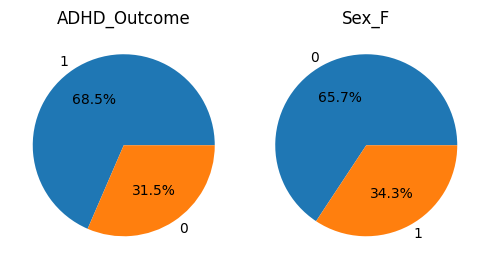

In [4]:
import matplotlib.pyplot as plt

# Define the target columns
target_columns = ['ADHD_Outcome', 'Sex_F']  # Update with actual column names if needed

# Create subplots for the two target variables
fig, axes = plt.subplots(1, 2, figsize=(5, 3))

for ax, col in zip(axes, target_columns):
    class_counts = train_solutions[col].value_counts(normalize=True) * 100  # Use the correct DataFrame
    ax.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'])
    ax.set_title(col)

plt.tight_layout()
plt.show()


****EXPLOTARY DATA ANALYSIS****

***Missing Values***

**train_categorcal**
* PreInt_Demos_Fam_Child_Ethnicity -11

**test_categorical**
* PreInt_Demos_Fam_Child_Ethnicity -3
* PreInt_Demos_Fam_Child_Race -6
* Barratt_Barratt_P1_Edu -1
* Barratt_Barratt_P1_Occ - 1
* Barratt_Barratt_P2_Edu -36
* Barratt_Barratt_P2_Occ  -42

**train_quantitative**
* MRI_Track_Age_at_Scan -360
  
**test_quantitative**
* EHQ_EHQ_Total                 - 1
* ColorVision_CV_Score          - 9
* APQ_P_APQ_P_CP              - 15
* APQ_P_APQ_P_ID               - 15
* APQ_P_APQ_P_INV              - 15
* APQ_P_APQ_P_OPD               -15
* APQ_P_APQ_P_PM                -15
* APQ_P_APQ_P_PP                -15
* SDQ_SDQ_Conduct_Problems      -30
* SDQ_SDQ_Difficulties_Total    -30
* SDQ_SDQ_Emotional_Problems    -30
* SDQ_SDQ_Externalizing         -30
* SDQ_SDQ_Generating_Impact     -30
* SDQ_SDQ_Hyperactivity         -30
* SDQ_SDQ_Internalizing         -30
* SDQ_SDQ_Peer_Problems         -30
* SDQ_SDQ_Prosocial             -30

In [ ]:
test_categorical

In [ ]:
train_functional

In [5]:
#fill missing values
train_categorical['PreInt_Demos_Fam_Child_Ethnicity'].fillna(train_categorical['PreInt_Demos_Fam_Child_Ethnicity'].mode()[0], inplace=True)

test_categorical['PreInt_Demos_Fam_Child_Ethnicity'].fillna(test_categorical['PreInt_Demos_Fam_Child_Ethnicity'].mode()[0], inplace=True)
test_categorical['PreInt_Demos_Fam_Child_Race'].fillna(test_categorical['PreInt_Demos_Fam_Child_Race'].mode()[0], inplace=True)
test_categorical['Barratt_Barratt_P1_Edu'].fillna(test_categorical['Barratt_Barratt_P1_Edu'].mode()[0], inplace=True)
test_categorical['Barratt_Barratt_P1_Occ'].fillna(test_categorical['Barratt_Barratt_P1_Occ'].mode()[0], inplace=True)
test_categorical['Barratt_Barratt_P2_Edu'].fillna(test_categorical['Barratt_Barratt_P2_Edu'].mode()[0], inplace=True)
test_categorical['Barratt_Barratt_P2_Occ'].fillna(test_categorical['Barratt_Barratt_P2_Occ'].mode()[0], inplace=True)

train_quantitative['MRI_Track_Age_at_Scan'].fillna(train_quantitative['MRI_Track_Age_at_Scan'].median(), inplace=True)

test_quantitative['EHQ_EHQ_Total'].fillna(test_quantitative['EHQ_EHQ_Total'].median(), inplace=True)
test_quantitative['ColorVision_CV_Score'].fillna(test_quantitative['ColorVision_CV_Score'].median(), inplace=True)
test_quantitative['APQ_P_APQ_P_CP'].fillna(test_quantitative['APQ_P_APQ_P_CP'].median(), inplace=True)
test_quantitative['APQ_P_APQ_P_ID'].fillna(test_quantitative['APQ_P_APQ_P_ID'].median(), inplace=True)
test_quantitative['APQ_P_APQ_P_INV'].fillna(test_quantitative['APQ_P_APQ_P_INV'].median(), inplace=True)
test_quantitative['APQ_P_APQ_P_OPD'].fillna(test_quantitative['APQ_P_APQ_P_OPD'].median(), inplace=True)
test_quantitative['APQ_P_APQ_P_PM'].fillna(test_quantitative['APQ_P_APQ_P_PM'].median(), inplace=True)
test_quantitative['APQ_P_APQ_P_PP'].fillna(test_quantitative['APQ_P_APQ_P_PP'].median(), inplace=True)

test_quantitative['SDQ_SDQ_Conduct_Problems'].fillna(test_quantitative['SDQ_SDQ_Conduct_Problems'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Difficulties_Total'].fillna(test_quantitative['SDQ_SDQ_Difficulties_Total'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Emotional_Problems'].fillna(test_quantitative['SDQ_SDQ_Emotional_Problems'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Externalizing'].fillna(test_quantitative['SDQ_SDQ_Externalizing'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Generating_Impact'].fillna(test_quantitative['SDQ_SDQ_Generating_Impact'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Hyperactivity'].fillna(test_quantitative['SDQ_SDQ_Hyperactivity'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Internalizing'].fillna(test_quantitative['SDQ_SDQ_Internalizing'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Peer_Problems'].fillna(test_quantitative['SDQ_SDQ_Peer_Problems'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Prosocial'].fillna(test_quantitative['SDQ_SDQ_Prosocial'].median(), inplace=True)




<ipython-input-5-d4f11780a9de>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_categorical['PreInt_Demos_Fam_Child_Ethnicity'].fillna(train_categorical['PreInt_Demos_Fam_Child_Ethnicity'].mode()[0], inplace=True)
<ipython-input-5-d4f11780a9de>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [ ]:
test_quantitative.isnull().sum()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_count_distribution(df, column):
    plt.figure(figsize=(5, 3))
    sns.countplot(x=column, data=df)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()

cat_cols = ['Basic_Demos_Enroll_Year','Basic_Demos_Study_Site','PreInt_Demos_Fam_Child_Ethnicity','PreInt_Demos_Fam_Child_Race','MRI_Track_Scan_Location','Barratt_Barratt_P1_Edu','Barratt_Barratt_P1_Occ','Barratt_Barratt_P1_Occ','Barratt_Barratt_P2_Edu','Barratt_Barratt_P2_Occ']

for cat in cat_cols:
    plot_count_distribution(train_categorical, cat)

In [6]:
train_categorical["new_col"]=train_categorical["Barratt_Barratt_P1_Edu"]+train_categorical["Barratt_Barratt_P2_Edu"]

In [ ]:
#feature Engineering
train_quantitative["APQ_positive"] = train_quantitative["APQ_P_APQ_P_INV"]+train_quantitative["APQ_P_APQ_P_PM"]+train_quantitative["APQ_P_APQ_P_PP"]
test_quantitative["APQ_positive"] = test_quantitative["APQ_P_APQ_P_INV"]+test_quantitative["APQ_P_APQ_P_PM"]+test_quantitative["APQ_P_APQ_P_PP"]


train_quantitative["APQ_negative"] = train_quantitative["APQ_P_APQ_P_CP"]+train_quantitative["APQ_P_APQ_P_ID"]+train_quantitative["APQ_P_APQ_P_OPD"]
test_quantitative["APQ_negative"] = test_quantitative["APQ_P_APQ_P_CP"]+test_quantitative["APQ_P_APQ_P_ID"]+train_quantitative["APQ_P_APQ_P_OPD"]




In [7]:
new_df_categorical = pd.concat([train_categorical, test_categorical], axis =0)

In [8]:
#Categorical Encoding
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_and_add(train, column):
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    one_hot_encoded = one_hot_encoder.fit_transform(train[[column]])
    encoded_columns = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out([column]))
    encoded_columns.index = train.index
    train = pd.concat([train, encoded_columns], axis=1)
    train = train.drop(columns=[column])
    return train

columns_to_encode = ['Basic_Demos_Enroll_Year','Basic_Demos_Study_Site','PreInt_Demos_Fam_Child_Ethnicity','PreInt_Demos_Fam_Child_Race','MRI_Track_Scan_Location','Barratt_Barratt_P1_Edu','Barratt_Barratt_P1_Occ','Barratt_Barratt_P1_Occ','Barratt_Barratt_P2_Edu','Barratt_Barratt_P2_Occ']

for col in columns_to_encode:
    new_df = one_hot_encode_and_add(new_df_categorical, col)

In [9]:
train_cat = new_df_categorical.dropna(subset=['new_col'])
test_cat = new_df_categorical[new_df_categorical['new_col'].isna()]

test_cat = test_cat.drop(columns=['new_col'])

In [10]:
train_cat = train_cat.drop(columns=['new_col'])

In [11]:
train_cat_01 = pd.merge(train_cat, train_functional, on = 'participant_id')
train_final = pd.merge(train_cat_01, train_quantitative, on = 'participant_id')

In [12]:
test_cat_01 = pd.merge(test_cat, test_functional, on = 'participant_id')
test_final = pd.merge(test_cat_01, test_quantitative, on = 'participant_id')

In [13]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    X = X.copy().dropna()  
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    return pd.Series(mi_scores, index=X.columns)

# Split target variables
y_adhd = train_solutions['ADHD_Outcome']
y_sex = train_solutions['Sex_F']

# Compute MI scores for each target
mi_scores_adhd = make_mi_scores(train_final.drop(columns=['participant_id']), y_adhd)
mi_scores_sex = make_mi_scores(train_final.drop(columns=['participant_id']), y_sex)

# Combine MI scores by taking the max score across both targets
mi_scores_combined = pd.DataFrame({'MI_Adhd': mi_scores_adhd, 'MI_Sex': mi_scores_sex})
mi_scores_combined['MI_Max'] = mi_scores_combined.max(axis=1)  # Take max MI for ranking

# Select top 50 or 100 features
top_n = 50  # Change to 100 if needed
top_features = mi_scores_combined.sort_values('MI_Max', ascending=False).index[:top_n]

# Keep only selected features
train_final_selected = train_final[top_features]

# Optional: Save cleaned dataset
train_final_selected.to_csv('train_final_cleaned.csv', index=False)

print(f"Selected Top {top_n} features using max MI scores ✅")


Selected Top 50 features using max MI scores ✅


In [ ]:
#selected features for train the model
train_final_selected

<Figure size 1200x600 with 0 Axes>

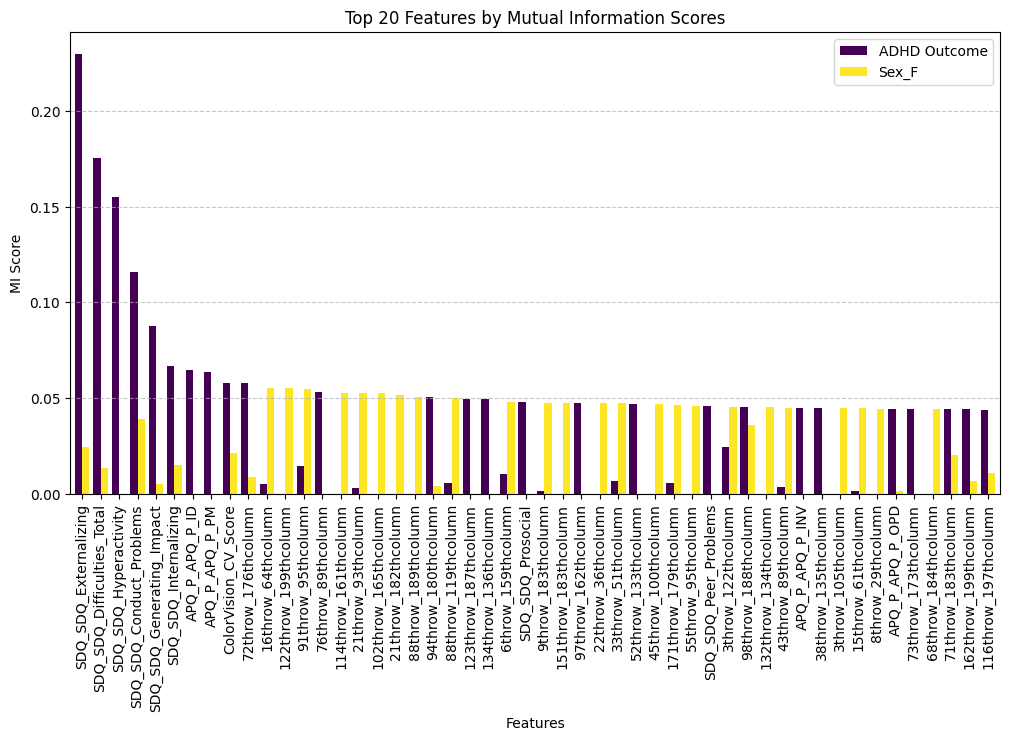

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 50 features for better visualization
top_n = 50
top_features = mi_scores_combined.sort_values('MI_Max', ascending=False).head(top_n)

# Plot
plt.figure(figsize=(12, 6))
top_features[['MI_Adhd', 'MI_Sex']].plot(kind='bar', width=0.8, figsize=(12, 6), colormap='viridis')

plt.title("Top 20 Features by Mutual Information Scores")
plt.ylabel("MI Score")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.legend(["ADHD Outcome", "Sex_F"], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [15]:
from sklearn.model_selection import train_test_split

X = train_final_selected
y = train_solutions.drop(columns=['participant_id'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

def predict_multi_target(X_train, y_train, X_test, y_test, model):
    # Dictionary to store results
    results = {}

    for target in y_train.columns:  # Process each target separately
        print(f"\n🔹 Evaluating target: {target}")

        # Train the model on the current target
        model.fit(X_train, y_train[target])
        y_pred = model.predict(X_test)

        # Store classification report
        results[target] = {
            "classification_report": classification_report(y_test[target], y_pred, output_dict=True),
            "confusion_matrix": confusion_matrix(y_test[target], y_pred)
        }

        # Plot confusion matrix
        plt.figure(figsize=(5, 5))
        sns.heatmap(results[target]["confusion_matrix"], annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for {target}')
        plt.show()

    return results


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)

predict_multi_target(X_train, y_train, X_test, y_test, tree_model)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=500, max_depth=10,random_state=42)

predict_multi_target(X_train, y_train, X_test, y_test, rf_model)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=5, random_state=42)

predict_multi_target(X_train, y_train, X_test, y_test, gb_model)

In [30]:
from sklearn.ensemble import RandomForestClassifier

final_model = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_split=5,random_state=42)
#final_model =LGBMClassifier(n_estimators=100, learning_rate=0.1)
final_model.fit(X, y)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=1000,
                       random_state=42)

In [32]:
selected_columns = train_final_selected.columns
new_test_final = test_final[selected_columns]

In [33]:
predictions = final_model.predict(new_test_final)
predictions

array([[1, 0],
       [0, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [1,

In [34]:
submission = pd.read_excel('/kaggle/input/widsdatathon2025/SAMPLE_SUBMISSION.xlsx')
submission

,participant_id,ADHD_Outcome,Sex_F
0,Cfwaf5FX7jWK,1,0
1,vhGrzmvA3Hjq,0,0
2,ULliyEXjy4OV,0,1
3,LZfeAb1xMtql,1,0
4,EnFOUv0YK1RG,1,0
...,...,...,...
299,UadZfjdEg7eG,1,0
300,IUEHiLmQAqCi,1,1
301,cRySmCadYFRO,1,0
302,E3MvDUtJadc5,1,0


In [35]:
predictions_df = pd.DataFrame(predictions, columns=['ADHD_Outcome', 'Sex_F'])

# Assuming your submission file has two columns: 'ID' and 'Prediction1', 'Prediction2'
submission[['ADHD_Outcome', 'Sex_F']] = predictions_df

In [22]:
submission

,participant_id,ADHD_Outcome,Sex_F
0,Cfwaf5FX7jWK,1,0
1,vhGrzmvA3Hjq,0,1
2,ULliyEXjy4OV,1,0
3,LZfeAb1xMtql,1,0
4,EnFOUv0YK1RG,1,0
...,...,...,...
299,UadZfjdEg7eG,1,0
300,IUEHiLmQAqCi,1,0
301,cRySmCadYFRO,0,0
302,E3MvDUtJadc5,1,0


In [36]:
submission.to_csv("submission3_new_WIDS.csv", index=False)